In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import scipy as sci
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_tweets_data.csv',index_col=0)
df.head()

,clean_text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus added commercials experienc...,2
2,virginamerica today must mean need take anothe...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0


In [3]:
x = df['clean_text']
y = df['airline_sentiment']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [5]:
tfidf_vec = TfidfVectorizer()

In [6]:
x_train = tfidf_vec.fit_transform(x_train) # we always fit_transform train data and transform data
x_test = tfidf_vec.transform(x_test)

In [7]:
x_train = sci.sparse.csr_matrix.todense(x_train)
x_test = sci.sparse.csr_matrix.todense(x_test)

In [8]:
x_train.shape[1]

11125

In [9]:
model = Sequential([
    Dense(12000,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(5000,activation='relu'),
    Dense(3000,activation='relu'),
    Dense(3,activation='softmax')
                   
                   ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12000)             133512000 
                                                                 
 dense_1 (Dense)             (None, 5000)              60005000  
                                                                 
 dense_2 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_3 (Dense)             (None, 3)                 9003      
                                                                 
Total params: 208,529,003
Trainable params: 208,529,003
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss= 'SparseCategoricalCrossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
21/21 [==============================] - 75s 3s/step - loss: 0.8599 - accuracy: 0.6061 - val_loss: 0.6572 - val_accuracy: 0.6409
Epoch 2/10
21/21 [==============================] - 61s 3s/step - loss: 0.4872 - accuracy: 0.8225 - val_loss: 0.6457 - val_accuracy: 0.7905
Epoch 3/10
21/21 [==============================] - 58s 3s/step - loss: 0.1417 - accuracy: 0.9595 - val_loss: 0.8038 - val_accuracy: 0.7705
Epoch 4/10
21/21 [==============================] - 58s 3s/step - loss: 0.0401 - accuracy: 0.9887 - val_loss: 1.1935 - val_accuracy: 0.7830
Epoch 5/10
21/21 [==============================] - 60s 3s/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 1.1653 - val_accuracy: 0.7748
Epoch 6/10
21/21 [==============================] - 54s 3s/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 1.1377 - val_accuracy: 0.7698
Epoch 7/10
21/21 [==============================] - 54s 3s/step - loss: 0.0135 - accuracy: 0.9947 - val_loss: 1.2260 - val_accuracy: 0.7801
Epoch 8/10
21/21 [==

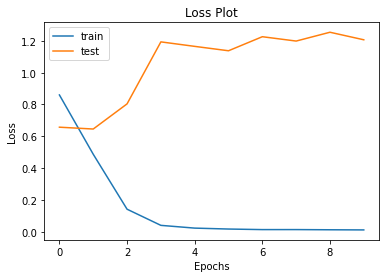

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['train','test'])

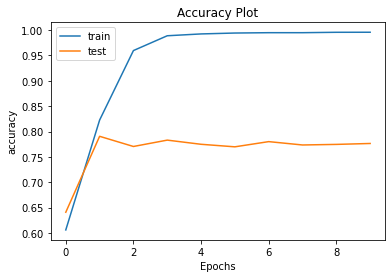

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Plot')
plt.legend(['train','test'])